## Lab 2 Deep Learning
Stefano Aragoni, Carol Arevalo

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization


In [48]:
#Load data into DatraFrame
df = pd.read_csv('movie_statistic_dataset.csv')

df.head()

movie_title production_date  \
0                     Avatar: The Way of Water      2022-12-09   
1                            Avengers: Endgame      2019-04-23   
2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                      Avengers: Age of Ultron      2015-04-22   
4                       Avengers: Infinity War      2018-04-25   

                     genres  runtime_minutes  director_name  \
0  Action,Adventure,Fantasy            192.0  James Cameron   
1    Action,Adventure,Drama            181.0              -   
2  Action,Adventure,Fantasy            137.0   Rob Marshall   
3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
4   Action,Adventure,Sci-Fi            149.0              -   

              director_professions director_birthYear director_deathYear  \
0         writer,producer,director               1954              alive   
1                                -                  -                  -   
2  director,miscellaneous,producer               1960              alive   
3         writer,producer,director               1964              alive   
4                                -                  -                  -   

   movie_averageRating  movie_numerOfVotes  approval_Index  \
0                  7.8            277543.0        7.061101   
1                  8.4           1143642.0        8.489533   
2                  6.6            533763.0        6.272064   
3                  7.3            870573.0        7.214013   
4                  8.4           1091968.0        8.460958   

   Production budget $  Domestic gross $  Worldwide gross $  
0            460000000         667830256         2265935552  
1            400000000         858373000         2794731755  
2            379000000         241071802         1045713802  
3            365000000         459005868         1395316979  
4            300000000         678815482         2048359754

In [49]:
# Eliminar columnas innecesarias
df.drop(["director_professions", "director_birthYear", "director_deathYear", "movie_title", "genres", "director_name", "production_date"], axis=1, inplace=True)

<AxesSubplot: >

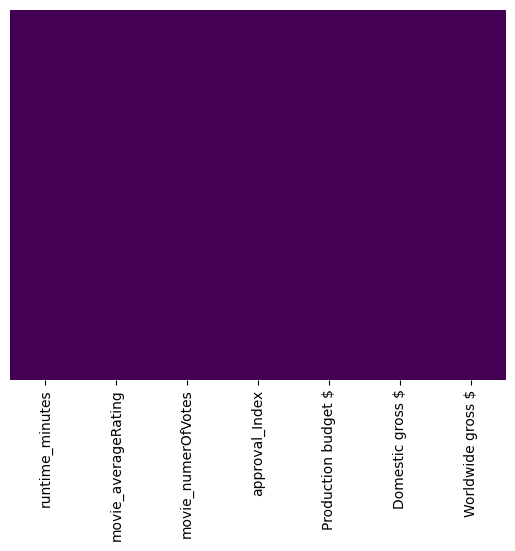

In [53]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


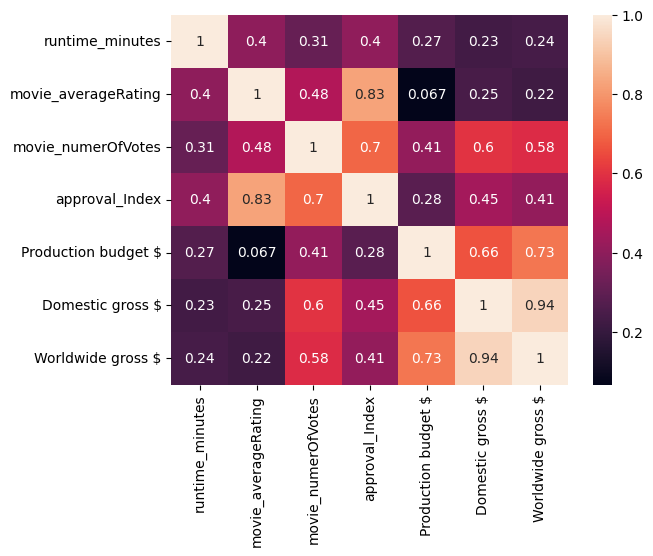

In [55]:
#matriz de corelacion
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
scaler = StandardScaler()
X = df.drop(['Worldwide gross $'], axis=1).values
X = scaler.fit_transform(X)

y = df[['Worldwide gross $']].values
y = scaler.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print(X_train)

[[ 0.30500413 -0.10493667 -0.61326475 -0.87342698 -0.43062964 -0.6820768 ]
 [ 0.20683621 -0.20260404 -0.53335352 -0.43181915 -0.19010046 -0.03305632]
 [ 0.69767579  0.67640227  0.04024031  0.75538331  0.2472253   0.30715025]
 ...
 [ 0.59950787  1.06707173 -0.18654762  0.84552229 -0.60555994 -0.17550134]
 [-0.38217128  0.5787349  -0.04500454  0.64216988 -0.74769082 -0.1561131 ]
 [ 0.25592017  0.18806543 -0.49803169 -0.11611136  0.46588819  0.05522322]]


In [58]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

Epoch 1/10
110/110 [==============================] - 1s 2ms/step - loss: 0.0668
Epoch 2/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0650
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 8/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.0962
Test loss: 0.0961889699101448
